In [0]:
import os

import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import cifar10, mnist
from keras.layers import (BatchNormalization, Conv2D, Conv2DTranspose, Dense,
                          Dropout, Flatten, Input, Reshape, UpSampling2D,
                          ZeroPadding2D)
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Model, Sequential
#from keras.optimizers import Adamifar10
from keras.optimizers import Adam
from sklearn.utils import shuffle

%matplotlib inline

Using TensorFlow backend.


In [0]:
# Consistent results
np.random.seed(10)

# The dimension of z
noise_dim = 100

batch_size = 16
steps_per_epoch = 3750 # 60000 / 16
epochs = 21

save_path = 'fcgan-images'

img_rows, img_cols, channels = 28, 28, 1

optimizer = Adam(0.0002, 0.5)

In [0]:
# Create path for saving images
if save_path != None and not os.path.isdir(save_path):
    os.mkdir(save_path)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
dataset=pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/A_ZHandwrittenData.csv')

In [0]:
dataset.rename(columns={'0':'label'}, inplace=True)

In [0]:
alphabets_mapper = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'} 
dataset_alphabets = dataset.copy()
dataset['label'] = dataset['label'].map(alphabets_mapper)

In [0]:
r_dataset = dataset[dataset['label']=='R'].copy()

In [0]:
# Splite data the X - Our data , and y - the prdict label
X = r_dataset.drop('label',axis = 1).astype(np.float32)
y = r_dataset['label']

In [0]:
XX = X.applymap(lambda l: 255-l).copy()

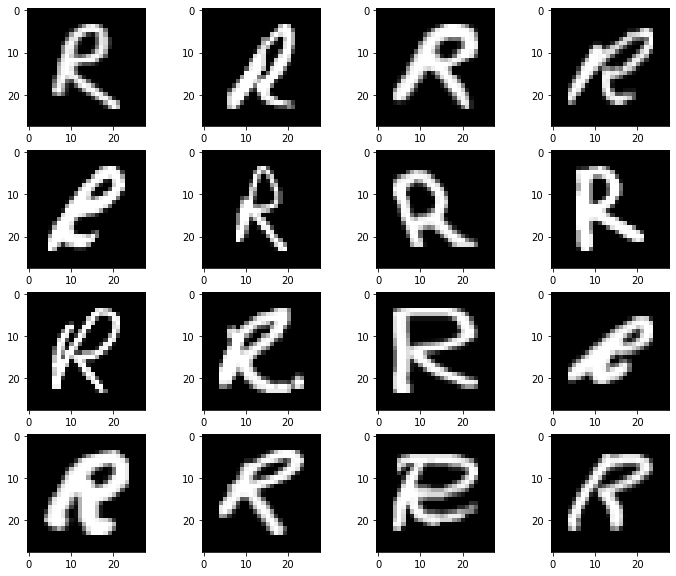

In [0]:
X_shuffle = shuffle(XX)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

In [0]:
x_train = XX.iloc[:7000, :]
y_train = y.iloc[:7000]
x_test = XX.iloc[7000:, :]
y_test = y.iloc[7000:]

In [0]:
# Load and pre-process data
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize to between -1 and 1
x_train = (x_train.astype(np.float32) - 127.5) / 127.5

x_train = x_train.values.reshape(-1, img_rows*img_cols*channels)

In [0]:
def create_generator():
    generator = Sequential()
    
    generator.add(Dense(256, input_dim=noise_dim))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(512))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(1024))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(img_rows*img_cols*channels, activation='tanh'))
    
    generator.compile(loss='binary_crossentropy', optimizer=optimizer)
    return generator

In [0]:
def create_descriminator():
    discriminator = Sequential()
     
    discriminator.add(Dense(1024, input_dim=img_rows*img_cols*channels))
    discriminator.add(LeakyReLU(0.2))

    discriminator.add(Dense(512))
    discriminator.add(LeakyReLU(0.2))

    discriminator.add(Dense(256))
    discriminator.add(LeakyReLU(0.2))

    discriminator.add(Dense(1, activation='sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)
    return discriminator

In [0]:
discriminator = create_descriminator()
generator = create_generator()

# Make the discriminator untrainable when we are training the generator.  This doesn't effect the discriminator by itself
discriminator.trainable = False

# Link the two models to create the GAN
gan_input = Input(shape=(noise_dim,))
fake_image = generator(gan_input)

gan_output = discriminator(fake_image)

gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=optimizer)

In [0]:
# Display images, and save them if the epoch number is specified
def show_images(noise, epoch=None):
    generated_images = generator.predict(noise)
    plt.figure(figsize=(10, 10))
    
    for i, image in enumerate(generated_images):
        plt.subplot(10, 10, i+1)
        if channels == 1:
            plt.imshow(image.reshape((img_rows, img_cols)), cmap='gray')
        else:
            plt.imshow(image.reshape((img_rows, img_cols, channels)))
        plt.axis('off')
    
    plt.tight_layout()
    
    if epoch != None and save_path != None:
        plt.savefig(f'{save_path}/gan-images_epoch-{epoch}.png')
    plt.show()

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch: 0 	 Discriminator Loss: 0.5550834536552429 		 Generator Loss: 1.5759685039520264


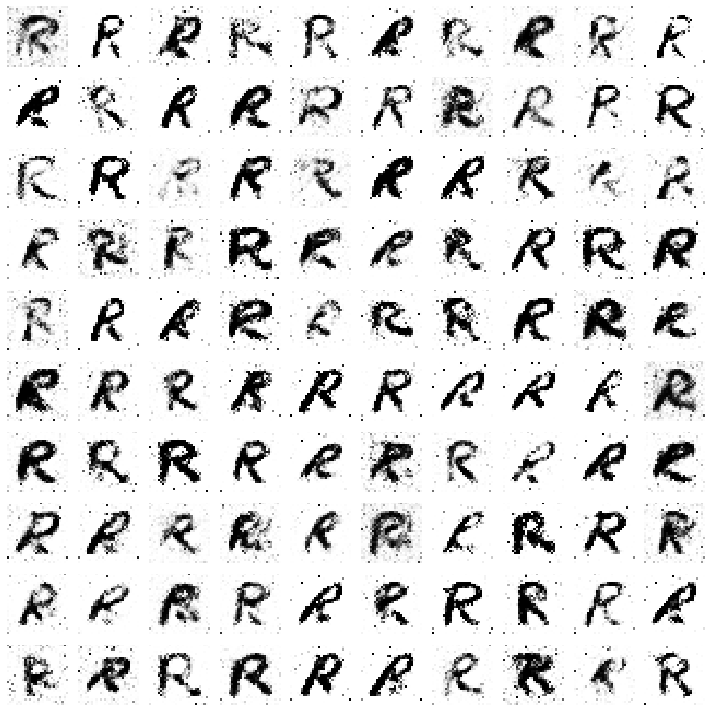

Epoch: 1 	 Discriminator Loss: 0.7213340997695923 		 Generator Loss: 1.1971850395202637


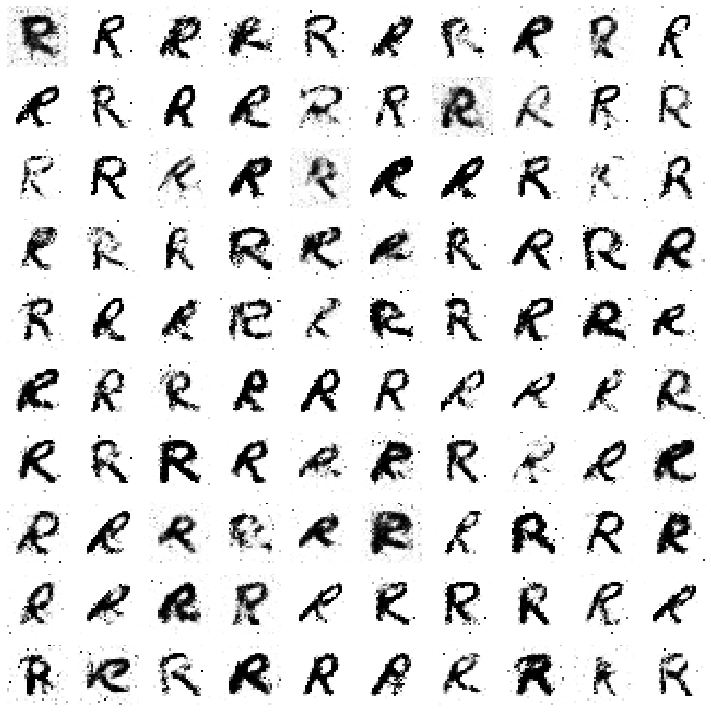

Epoch: 2 	 Discriminator Loss: 0.6602775454521179 		 Generator Loss: 1.6668260097503662


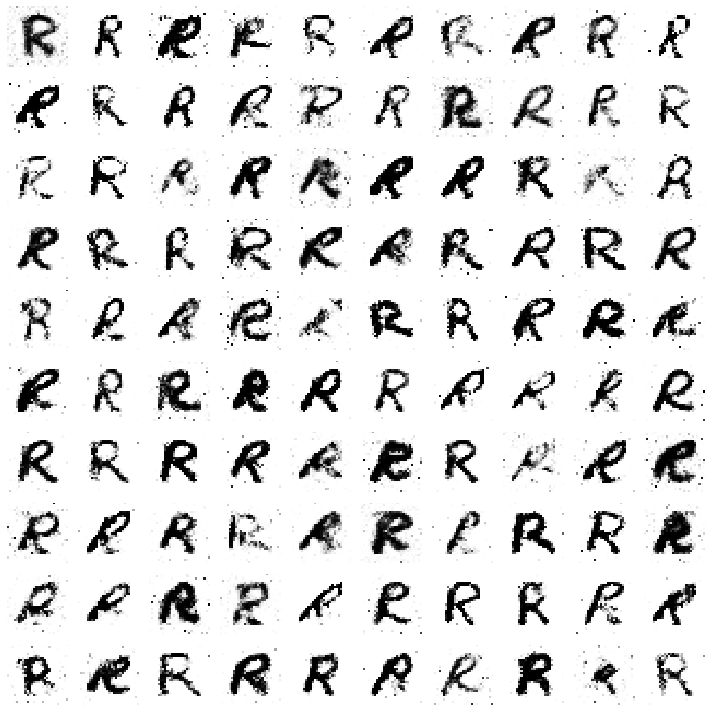

Epoch: 3 	 Discriminator Loss: 0.5268566608428955 		 Generator Loss: 1.4949231147766113


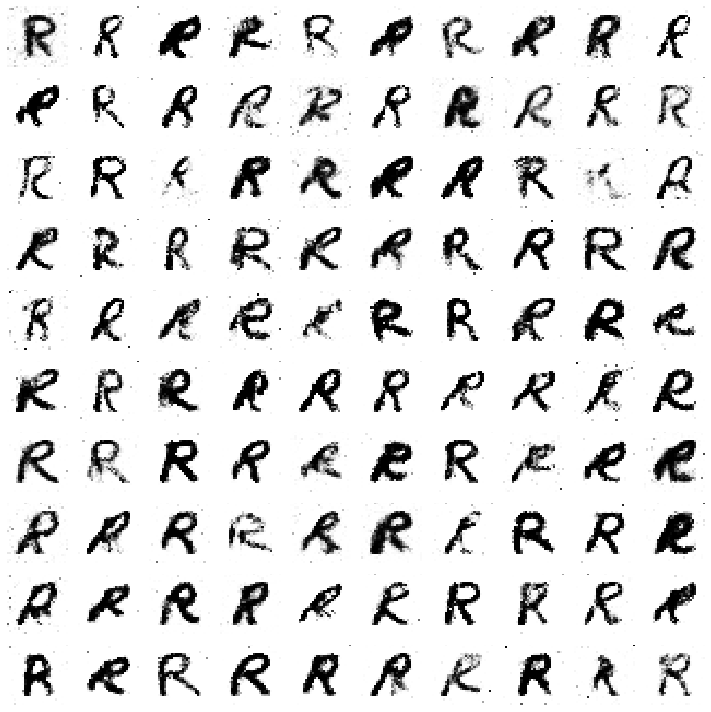

Epoch: 4 	 Discriminator Loss: 0.572335958480835 		 Generator Loss: 1.2913204431533813


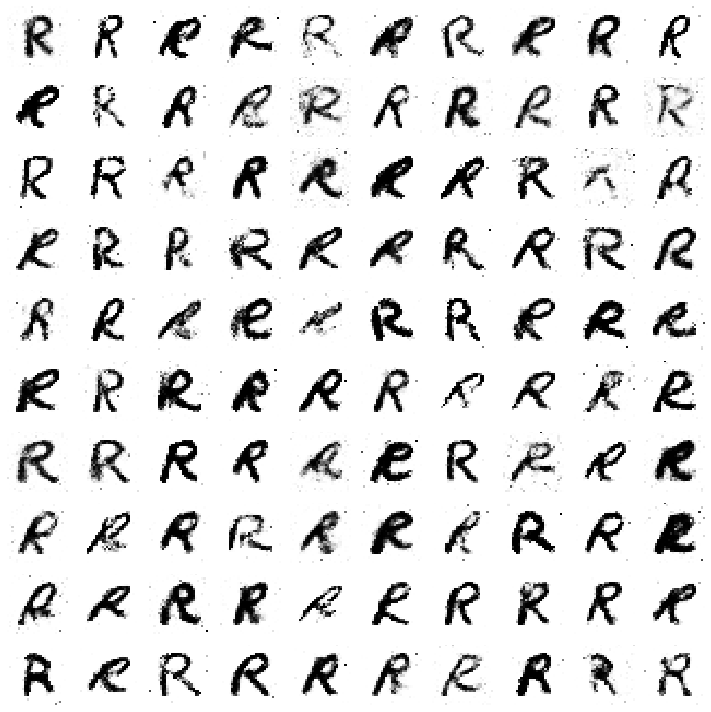

Epoch: 5 	 Discriminator Loss: 0.44492024183273315 		 Generator Loss: 1.9019336700439453


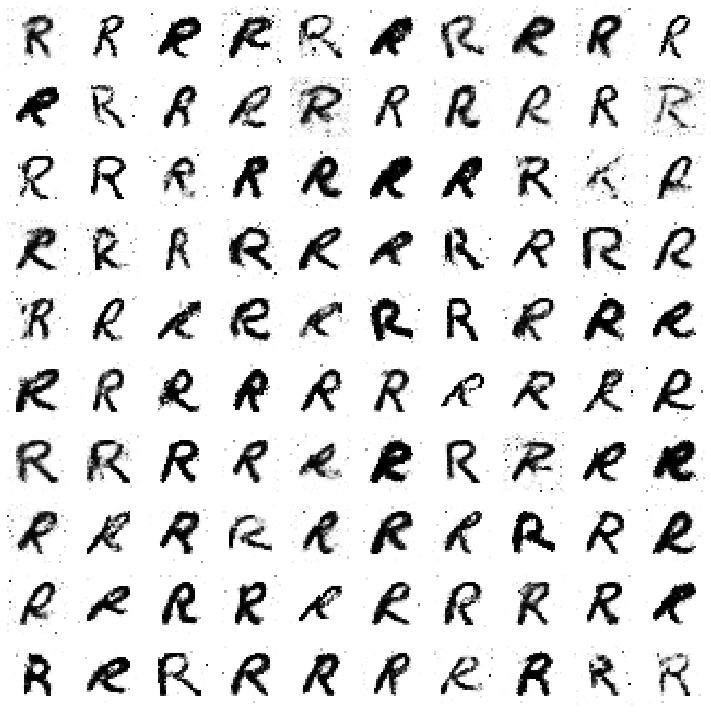

Epoch: 6 	 Discriminator Loss: 0.46735191345214844 		 Generator Loss: 2.740363597869873


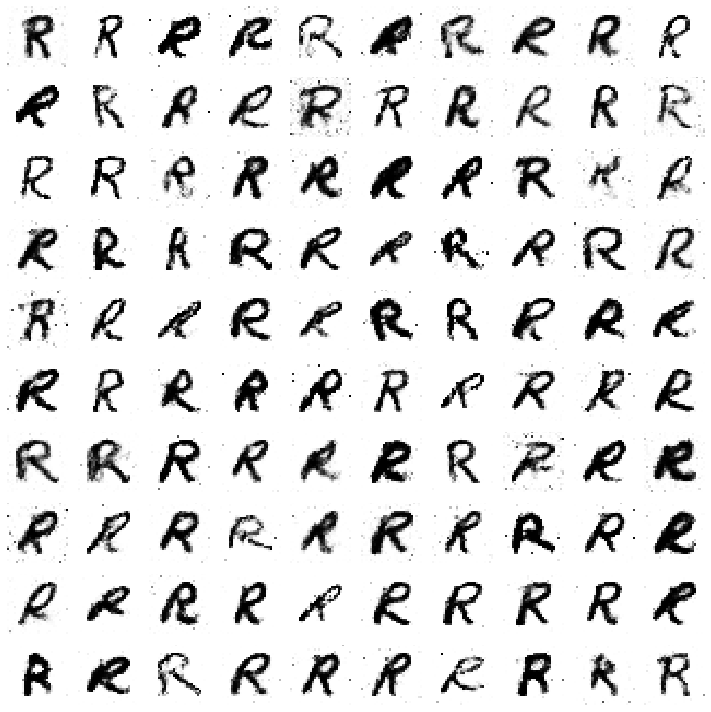

Epoch: 7 	 Discriminator Loss: 0.37882500886917114 		 Generator Loss: 2.7798681259155273


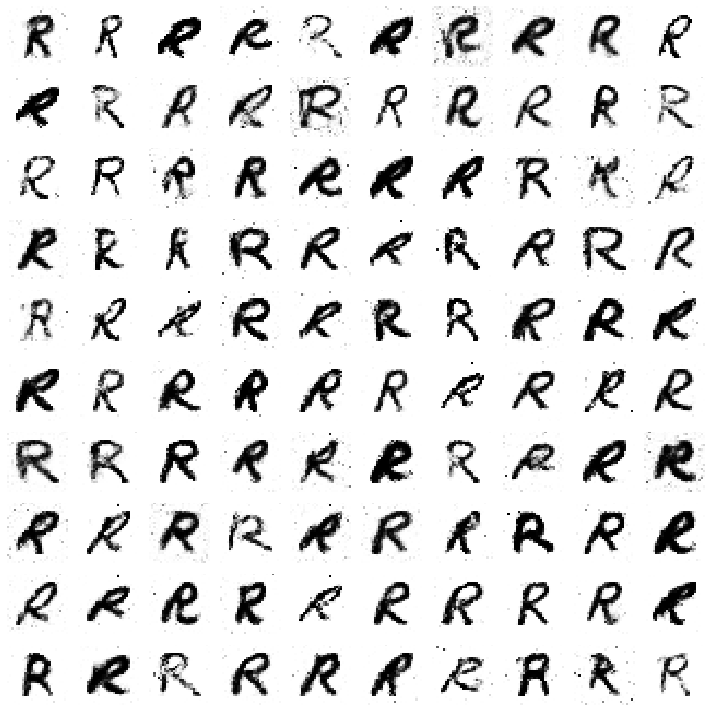

Epoch: 8 	 Discriminator Loss: 0.33342331647872925 		 Generator Loss: 2.7735204696655273


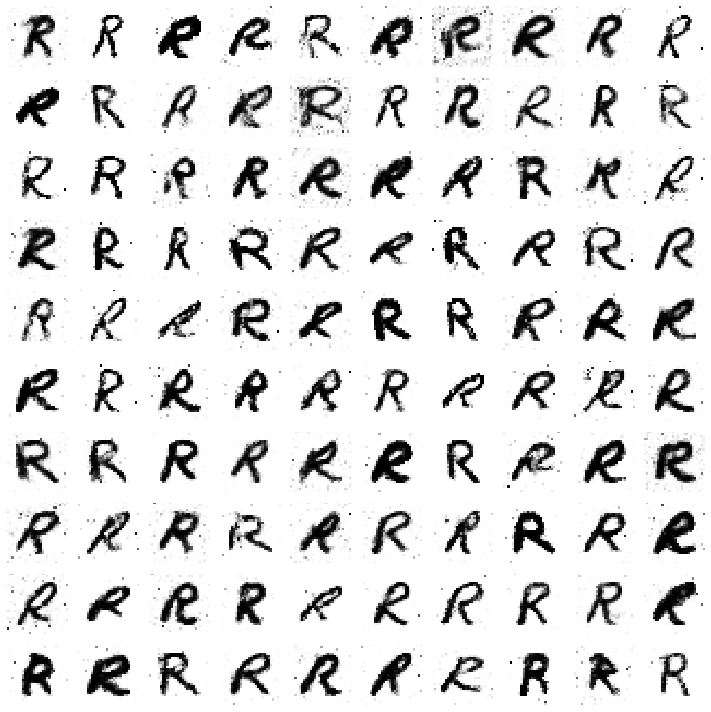

Epoch: 9 	 Discriminator Loss: 0.3673616051673889 		 Generator Loss: 2.800841808319092


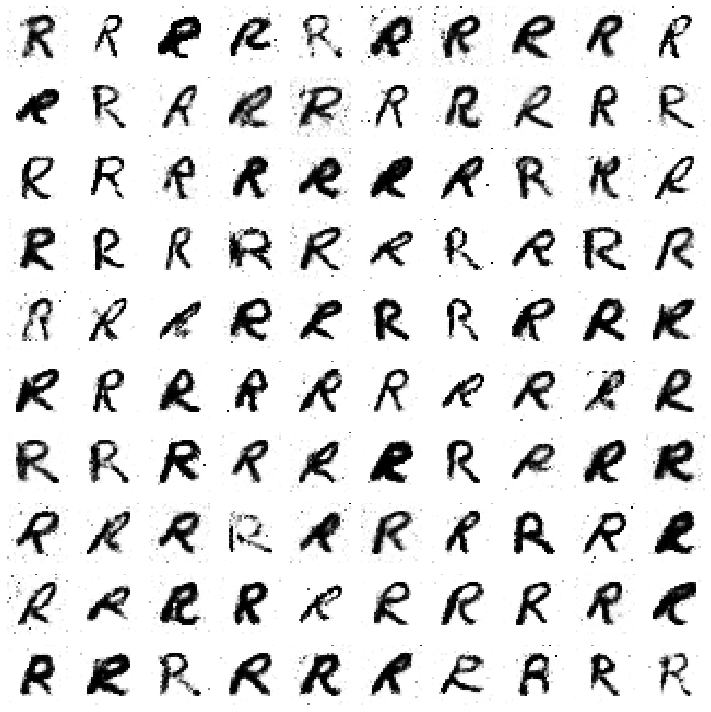

Epoch: 10 	 Discriminator Loss: 0.24878400564193726 		 Generator Loss: 4.013322830200195


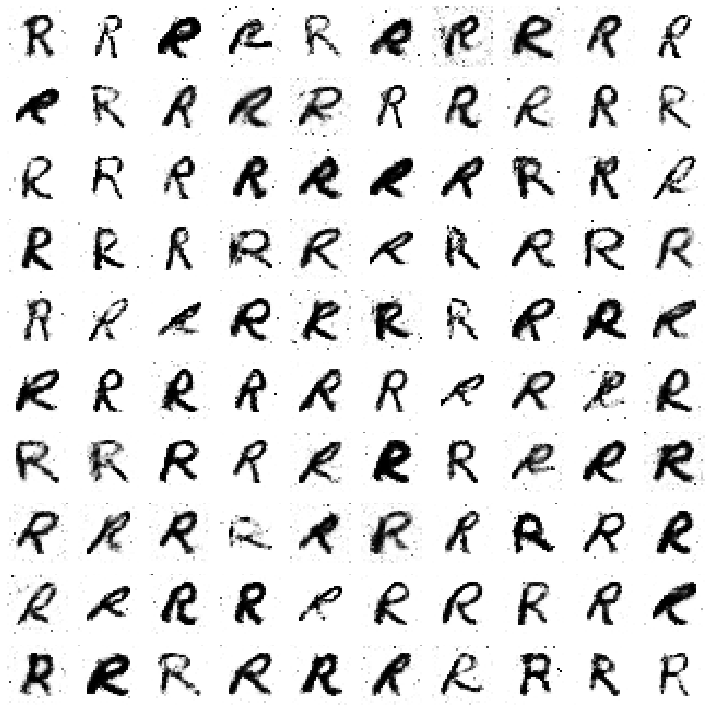

Epoch: 11 	 Discriminator Loss: 0.2595973014831543 		 Generator Loss: 3.4434280395507812


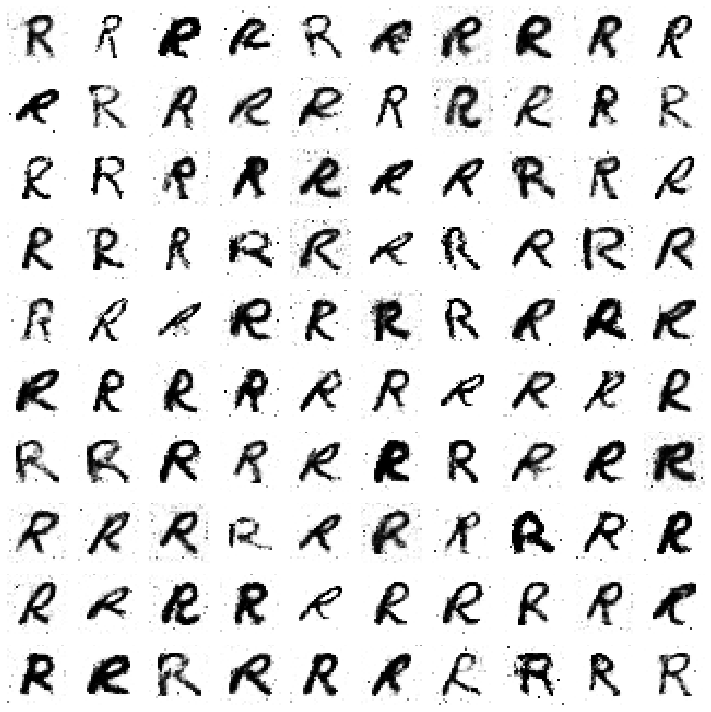

Epoch: 12 	 Discriminator Loss: 0.22722722589969635 		 Generator Loss: 3.9299871921539307


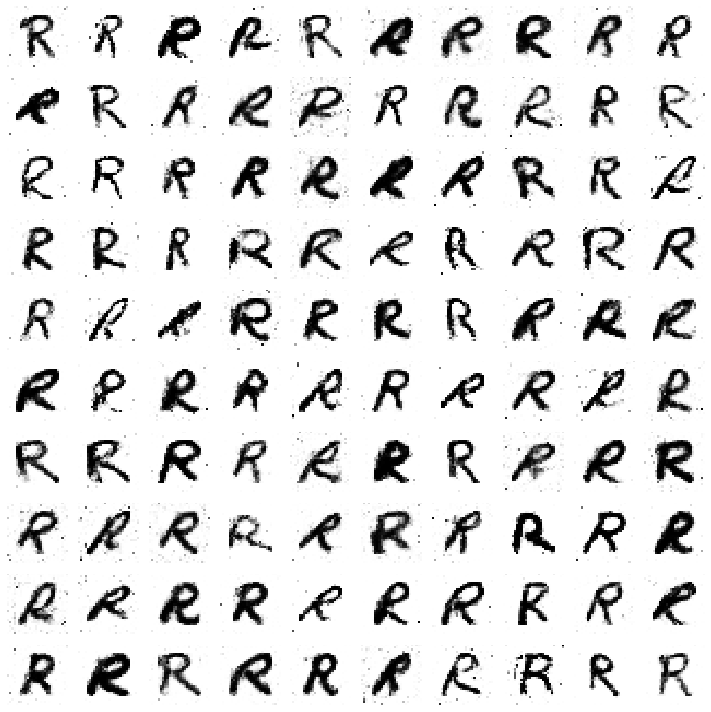

Epoch: 13 	 Discriminator Loss: 0.36282187700271606 		 Generator Loss: 4.817638397216797


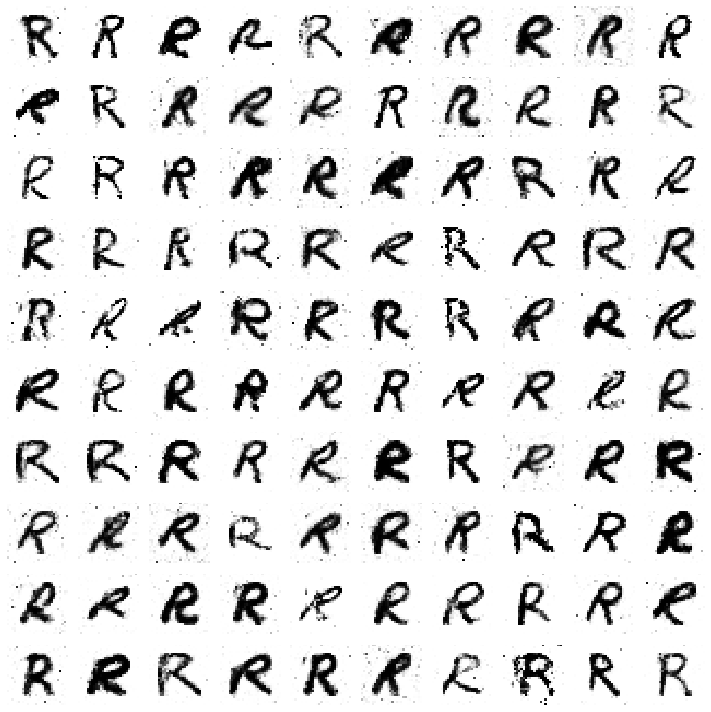

Epoch: 14 	 Discriminator Loss: 0.3300531208515167 		 Generator Loss: 4.974813461303711


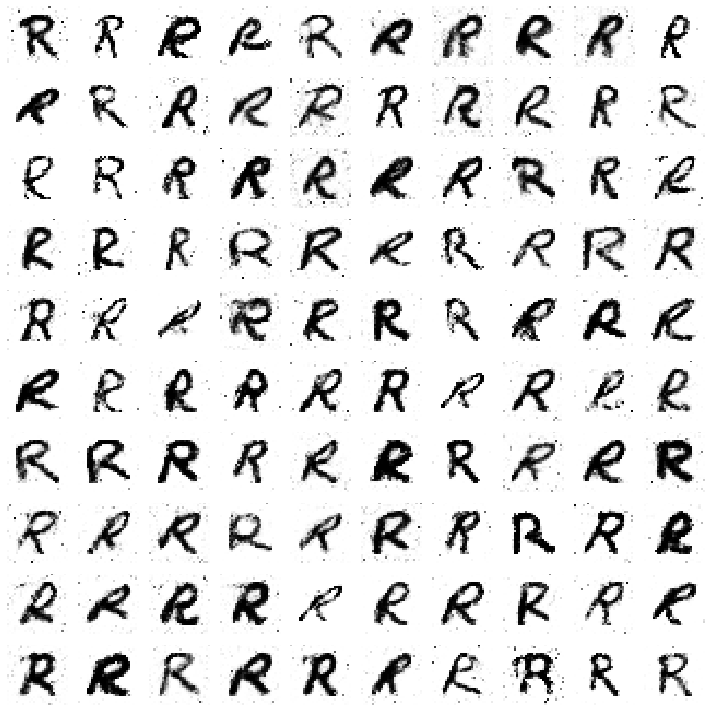

Epoch: 15 	 Discriminator Loss: 0.256240576505661 		 Generator Loss: 3.4486706256866455


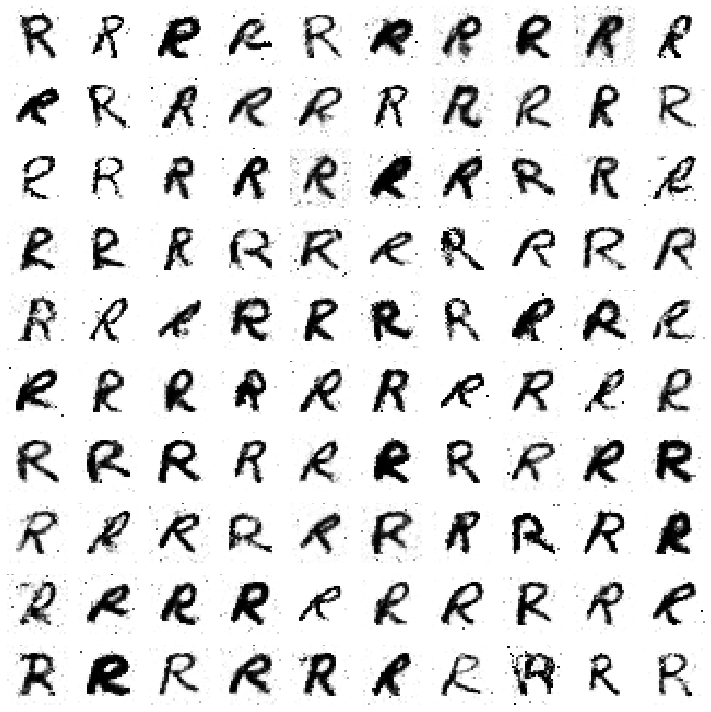

Epoch: 16 	 Discriminator Loss: 0.32947659492492676 		 Generator Loss: 3.4257497787475586


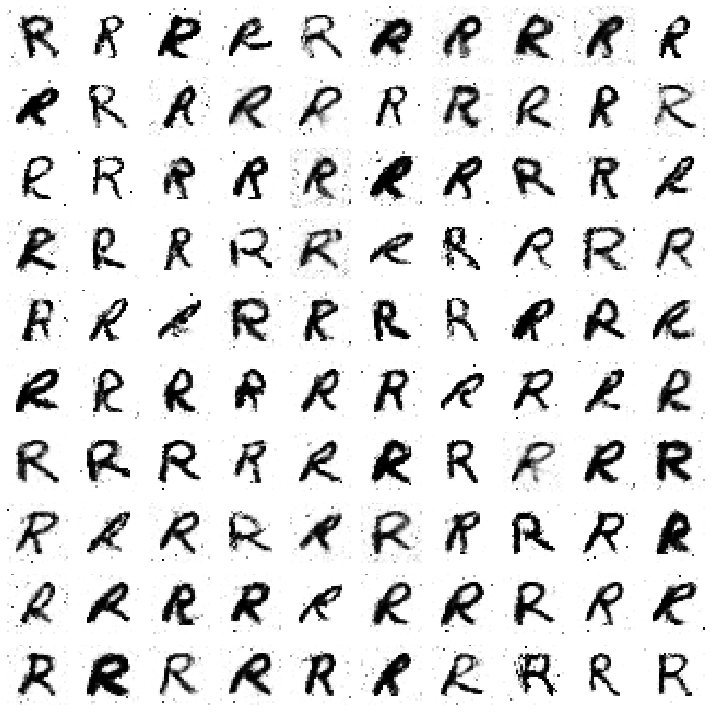

Epoch: 17 	 Discriminator Loss: 0.24476775527000427 		 Generator Loss: 4.927297592163086


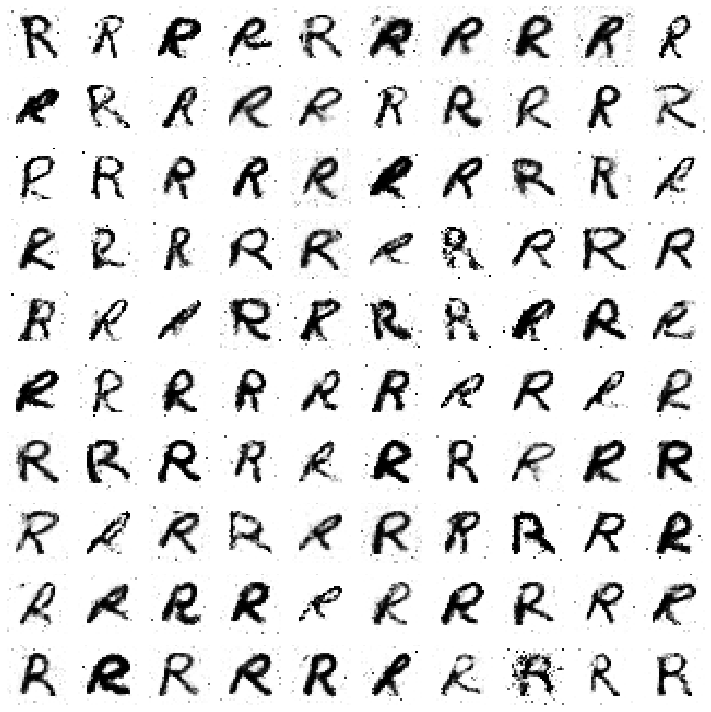

Epoch: 18 	 Discriminator Loss: 0.26036056876182556 		 Generator Loss: 3.66452693939209


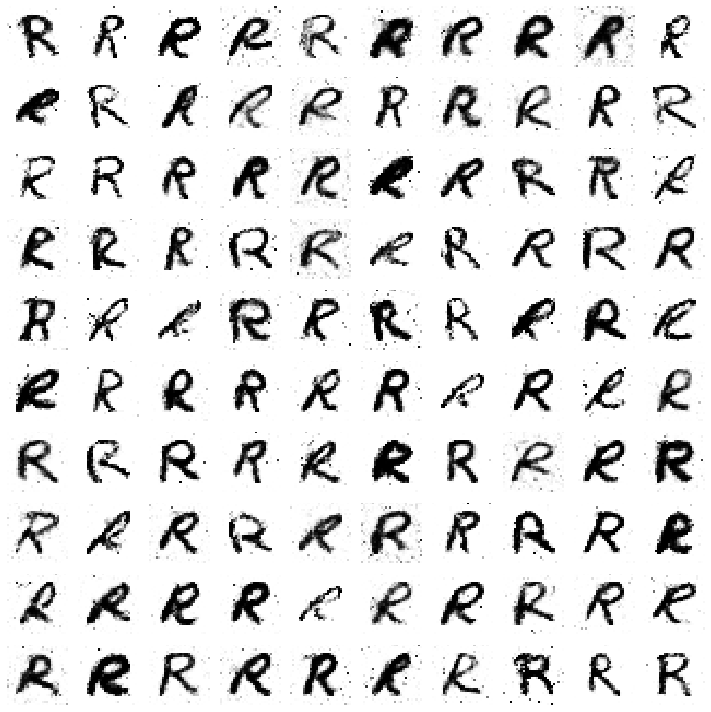

Epoch: 19 	 Discriminator Loss: 0.3091685473918915 		 Generator Loss: 4.12797737121582


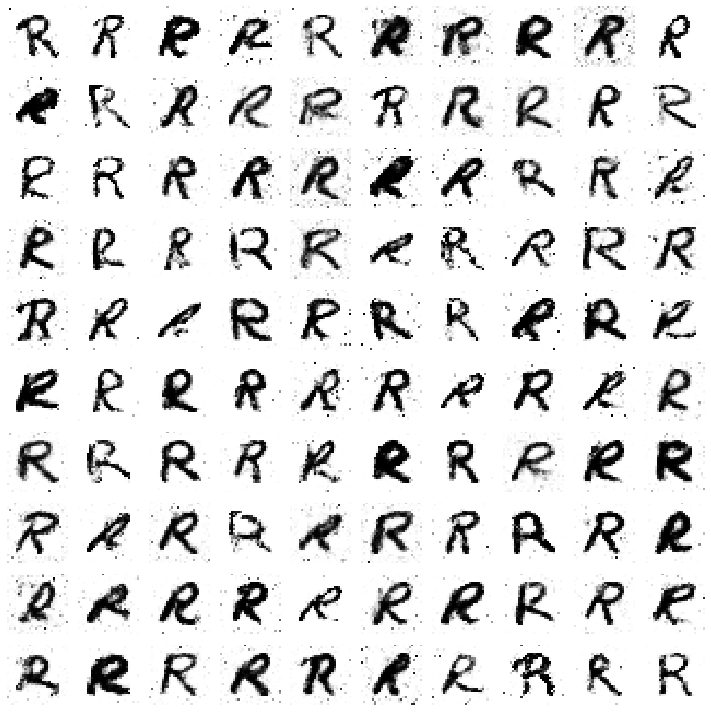

Epoch: 20 	 Discriminator Loss: 0.22755056619644165 		 Generator Loss: 4.851872444152832


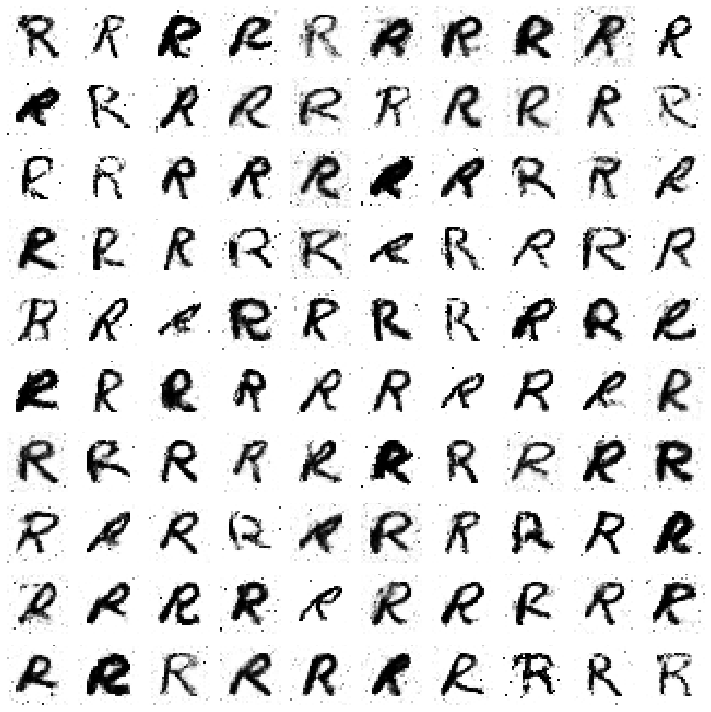

In [0]:
# Constant noise for viewing how the GAN progresses
static_noise = np.random.normal(0, 1, size=(100, noise_dim))

for epoch in range(epochs):
    for batch in range(steps_per_epoch):
        noise = np.random.normal(0, 1, size=(batch_size, noise_dim))
        fake_x = generator.predict(noise)

        real_x = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)]
        
        x = np.concatenate((real_x, fake_x))

        disc_y = np.zeros(2*batch_size)
        disc_y[:batch_size] = 0.9

        d_loss = discriminator.train_on_batch(x, disc_y)

        y_gen = np.ones(batch_size)
        g_loss = gan.train_on_batch(noise, y_gen)

    print(f'Epoch: {epoch} \t Discriminator Loss: {d_loss} \t\t Generator Loss: {g_loss}')
    #if epoch % 10 == 0:
    show_images(static_noise, epoch)

In [0]:
# Turn the training process into a GIF
from PIL import Image, ImageDraw

frames = []
for image in os.listdir(save_path):
    frames.append(Image.open(save_path + '/' + image))
frames[0].save('gan_training.gif', format='GIF', append_images=frames[1:], save_all=True, duration=500, loop=0)

discriminator.save('fcdiscriminator.hdf5')
generator.save('fcgenerator.hdf5')